# Data Analysis

Here I am going to try to make a pipeline for getting the price data out of the [prices.txt](../src/prices.txt) file, and working it into a usable format for visualization and analysis.

In [19]:
import matplotlib.pyplot as plt
import json
from dateutil.parser import parse
import pandas as pd

In [20]:
with open('../src/prices.txt', 'r') as file:
    lines = [json.loads(line) for line in file.readlines()]

This will leave me with a list of dicts, each one representing a price check on all of the coins

In [21]:
lines[0]

{'16/11/2020 15:11:44': {'btc': 16813.69,
  'eth': 463.05,
  'usdt': 1.0,
  'xrp': 0.284834,
  'link': 12.64,
  'ltc': 71.14,
  'bch': 248.76,
  'dot': 4.46,
  'bnb': 28.06,
  'ada': 0.104162,
  'bsv': 158.82,
  'usdc': 1.0,
  'eos': 2.58,
  'xmr': 117.9,
  'wbtc': 16785.34,
  'trx': 0.02551844,
  'xlm': 0.081883,
  'cdai': 0.02087414,
  'xtz': 2.07,
  'cro': 0.065379,
  'okb': 4.62,
  'xem': 0.136501,
  'leo': 1.25,
  'atom': 5.11,
  'neo': 15.73,
  'dai': 1.0,
  'fil': 27.49,
  'aave': 71.08,
  'ht': 3.55,
  'dash': 80.98,
  'uni': 3.5,
  'vet': 0.01131151,
  'cel': 1.89,
  'miota': 0.255838,
  'zec': 66.13,
  'busd': 0.999656,
  'etc': 5.34,
  'theta': 0.619125,
  'snx': 4.4,
  'yfi': 18348.06,
  'ceth': 9.27,
  'waves': 4.87,
  'omg': 3.44,
  'comp': 120.54,
  'mkr': 518.62,
  'uma': 8.11,
  'pax': 0.999936,
  'ont': 0.474303,
  'doge': 0.00287498,
  'cusdc': 0.02122336}}

In [22]:
dates = [parse(date) for line in lines for date in line]
dates

[datetime.datetime(2020, 11, 16, 15, 11, 44),
 datetime.datetime(2020, 11, 16, 16, 3, 4),
 datetime.datetime(2020, 11, 16, 20, 57, 8),
 datetime.datetime(2020, 11, 16, 21, 1, 34),
 datetime.datetime(2020, 11, 17, 9, 34, 26),
 datetime.datetime(2020, 11, 17, 10, 10, 27),
 datetime.datetime(2020, 11, 17, 14, 6, 40),
 datetime.datetime(2020, 11, 18, 12, 21, 22),
 datetime.datetime(2020, 11, 18, 13, 50, 12),
 datetime.datetime(2020, 11, 18, 14, 11, 29),
 datetime.datetime(2020, 11, 18, 14, 48, 28),
 datetime.datetime(2020, 11, 18, 16, 32, 39),
 datetime.datetime(2020, 11, 18, 17, 26, 3),
 datetime.datetime(2020, 11, 18, 17, 39, 24),
 datetime.datetime(2020, 11, 19, 11, 54, 38),
 datetime.datetime(2020, 11, 19, 12, 41, 17),
 datetime.datetime(2020, 11, 19, 13, 27, 23),
 datetime.datetime(2020, 11, 19, 16, 20, 1),
 datetime.datetime(2020, 11, 19, 16, 36, 17),
 datetime.datetime(2020, 11, 19, 17, 36, 17),
 datetime.datetime(2020, 11, 20, 11, 16, 7)]

In [23]:
data = [list(x.values())[0] for x in lines]

In [24]:
df = pd.DataFrame(data, index=dates)
df.head()

,btc,eth,usdt,xrp,link,ltc,bch,dot,bnb,ada,...,waves,omg,comp,mkr,uma,pax,ont,doge,cusdc,ftt
2020-11-16 15:11:44,16813.69,463.05,1.000000,0.284834,12.64,71.14,248.76,4.46,28.06,0.104162,...,4.87,3.44,120.54,518.62,8.11,0.999936,0.474303,0.002875,0.021223,NaN
2020-11-16 16:03:04,16711.99,459.02,1.000000,0.283605,12.56,70.67,248.57,4.46,27.85,0.103655,...,4.80,3.43,119.64,515.39,8.06,0.999121,0.474308,0.002904,NaN,3.68
2020-11-16 20:57:08,16635.88,463.82,0.999829,0.291655,12.74,73.30,251.15,4.58,28.35,0.105281,...,4.73,3.52,124.76,514.52,8.40,0.998429,0.480078,0.002917,NaN,3.70
2020-11-16 21:01:34,16654.07,463.86,0.999829,0.291693,12.75,73.39,250.95,4.59,28.41,0.105449,...,4.73,3.51,124.72,516.51,8.42,0.999061,0.480289,0.002916,NaN,3.70
2020-11-17 09:34:26,17213.15,469.07,1.000000,0.298629,12.65,72.73,254.24,4.81,28.37,0.109931,...,4.83,3.44,121.17,517.85,8.18,1.000000,0.507257,0.002937,NaN,3.81


#### That looks great

Now I'll just wrap it all in a helper function and put it in a little module

In [25]:
def load_data():
    """Load data from raw text files into a DataFrame
    """
    import pandas as pd
    import json
    from dateutil.parser import parse
    
    # Load raw text
    with open('../src/prices.txt', 'r') as file:
        lines = [json.loads(line) for line in file.readlines()]
    with open('../src/decoder.txt', 'r') as file:
        decoder = json.load(file)        
    
    # Hacky formatting for DataFrame
    dates = [parse(date) for line in lines for date in line]
    data = [list(x.values())[0] for x in lines]
    
    # Make Dataframe and convert coin codes to names
    result = pd.DataFrame(data=data, index=dates)   
    result.columns = result.columns.map(decoder)
    
    return result

### Visualization.........

Visualizing these prices will be an interesting challenge. Typically you see separate line plots for each coin, laid out in a grid. Maybe that's worth trying at first.

In [26]:
font = {'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

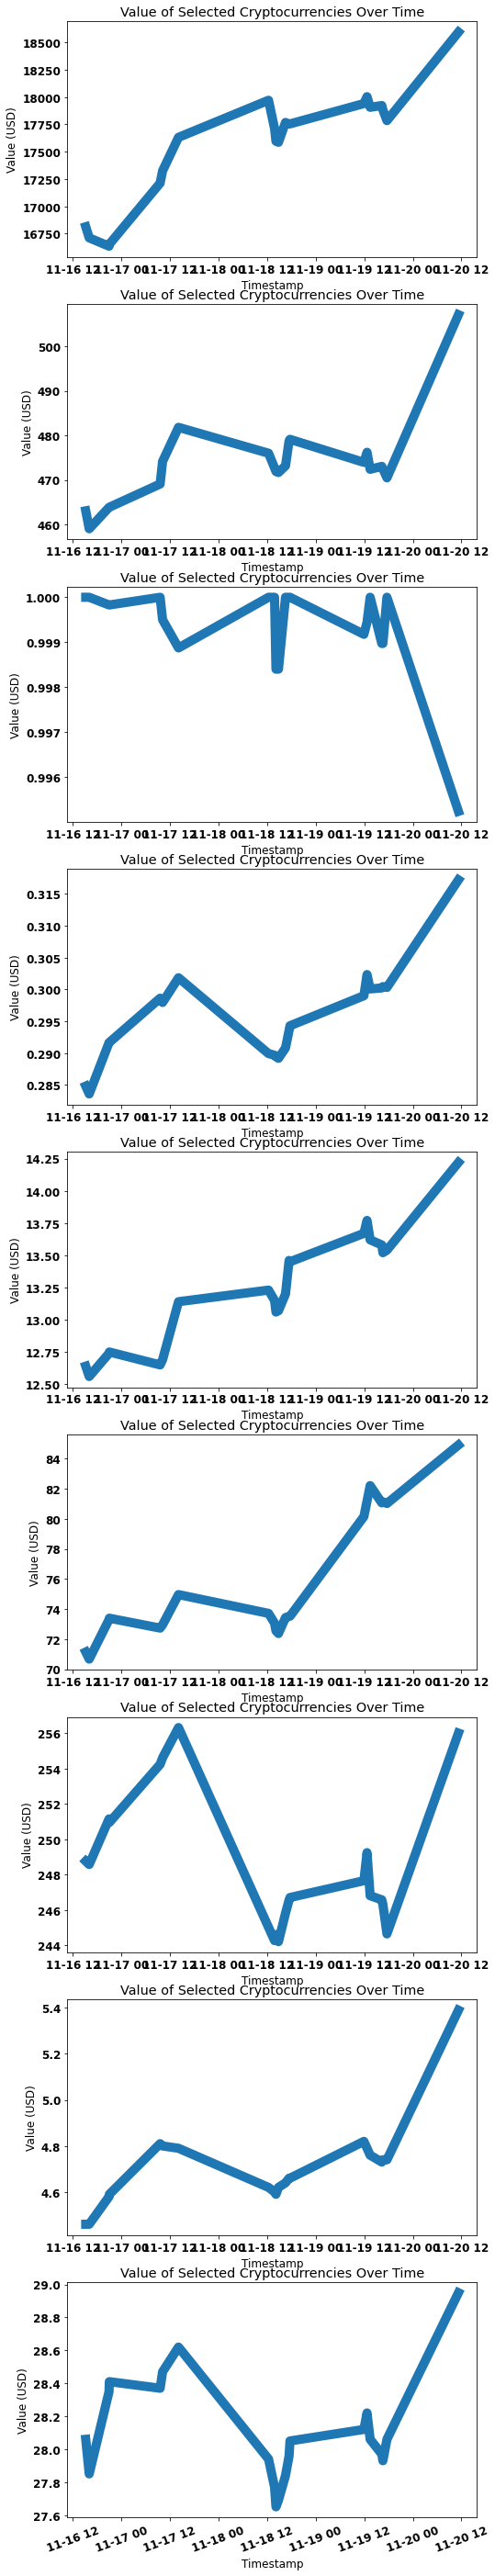

In [31]:
fig, ax = plt.subplots(9, figsize=(8, 50))

for i in range(9):
    ax[i].set_xlabel('Timestamp')
    plt.xticks(rotation=20)
    ax[i].set_ylabel('Value (USD)')
    ax[i].set_title('Value of Selected Cryptocurrencies Over Time')
    ax[i].plot(df.iloc[:,i], linewidth=10);